In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chris\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("btc_3m.csv")
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


In [3]:
df.tail()

,datetime,open,high,low,close,volume
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.71790
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.36942
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.34601
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.83873
713016,2022-01-31 05:30:00,37881.75,37951.07,37880.00,37919.12,55.69696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713017 entries, 0 to 713016
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  713017 non-null  object 
 1   open      713017 non-null  float64
 2   high      713017 non-null  float64
 3   low       713017 non-null  float64
 4   close     713017 non-null  float64
 5   volume    713017 non-null  float64
dtypes: float64(5), object(1)
memory usage: 32.6+ MB


In [5]:
df.shape

(713017, 6)

In [6]:
df.describe(include="all")

,datetime,open,high,low,close,volume
count,713017,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000
unique,713017,NaN,NaN,NaN,NaN,NaN
top,2018-01-01 05:30:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,18807.323944,18831.272011,18782.884174,18807.356373,113.791132
std,NaN,17870.632088,17893.686239,17847.464655,17870.647886,153.718050
min,NaN,3160.000000,3164.870000,3156.260000,3162.070000,0.000000
25%,NaN,7134.890000,7141.140000,7128.080000,7134.960000,41.807979
50%,NaN,9532.520000,9541.530000,9522.850000,9532.590000,72.168931
75%,NaN,32660.490000,32720.780000,32601.910000,32660.420000,128.161217


In [7]:
#The data types has analyzed and Standard deviation is more

In [8]:
#EDA

In [9]:
df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [10]:
dups=df.duplicated()
dups.sum()

0

In [11]:
#univariate analysis

Text(0.5, 1.0, 'Histogram of Close Prices')

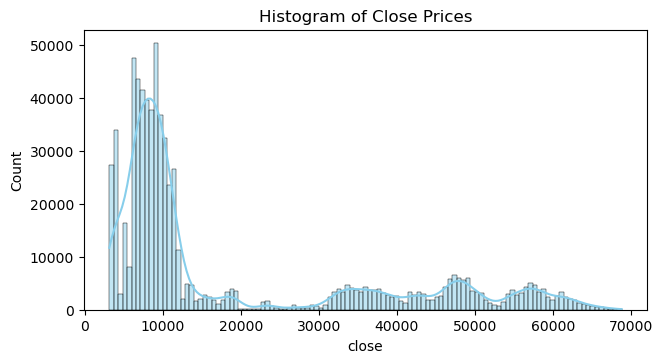

In [12]:
plt.figure(figsize=(16, 8))

# Histogram of 'close' prices
plt.subplot(2, 2, 1)
sns.histplot(df['close'], kde=True, color='skyblue')
plt.title('Histogram of Close Prices')


Text(0.5, 1.0, 'Histogram of high Prices')

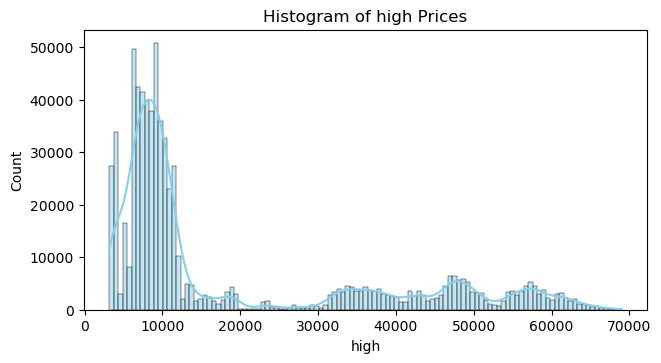

In [13]:
plt.figure(figsize=(16, 8))

# Histogram of 'close' prices
plt.subplot(2, 2, 1)
sns.histplot(df['high'], kde=True, color='skyblue')
plt.title('Histogram of high Prices')


Text(0.5, 1.0, 'low of Close Prices')

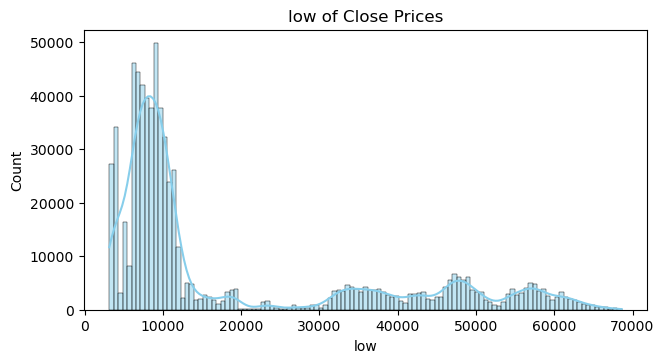

In [14]:
plt.figure(figsize=(16, 8))

# Histogram of 'close' prices
plt.subplot(2, 2, 1)
sns.histplot(df['low'], kde=True, color='skyblue')
plt.title('low of Close Prices')


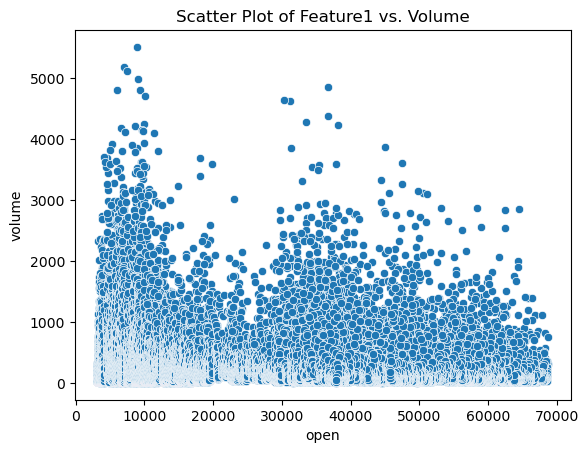

In [15]:
sns.scatterplot(x=df['open'], y=df['volume'])
plt.title('Scatter Plot of Feature1 vs. Volume')
plt.show()

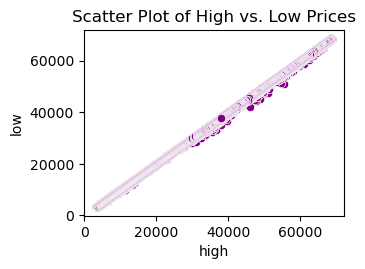

In [16]:
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['high'], y=df['low'], color='purple')
plt.title('Scatter Plot of High vs. Low Prices')

plt.tight_layout()
plt.show()

In [17]:
#outlier detection 

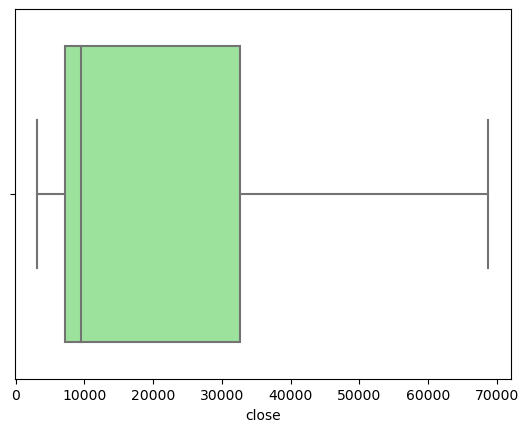

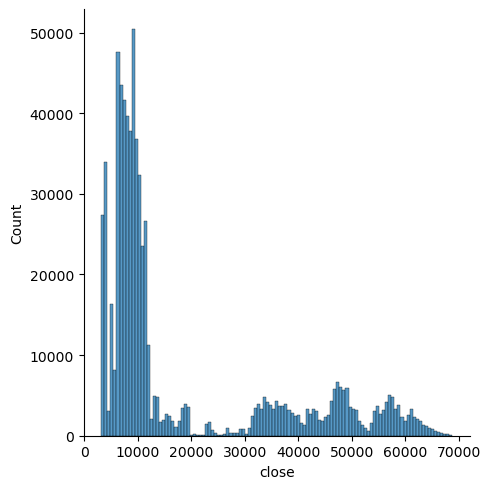

In [18]:
sns.boxplot(x=df['close'], color='lightgreen')
sns.displot(x=df['close'])

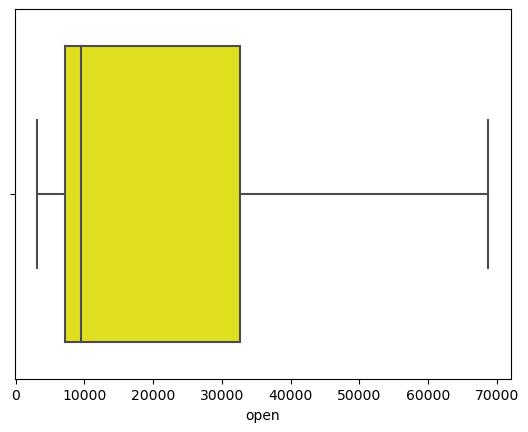

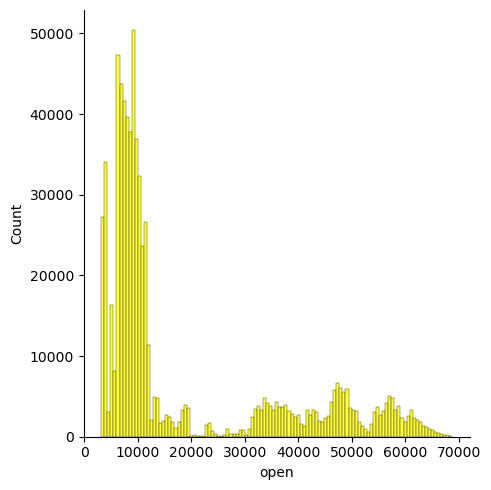

In [19]:
sns.boxplot(x=df['open'], color='yellow')
sns.displot(x=df['open'],color='yellow')

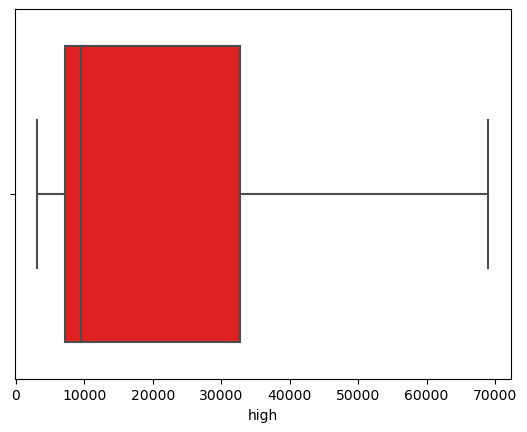

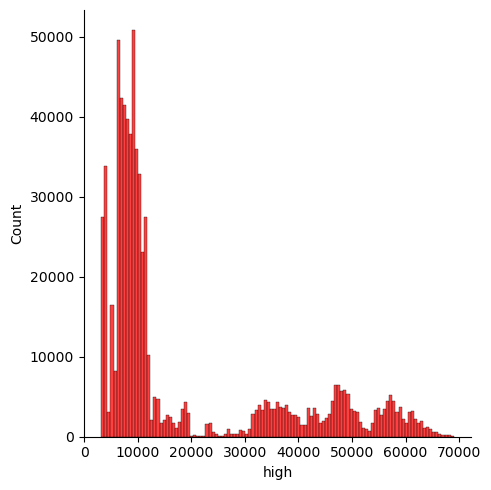

In [20]:
sns.boxplot(x=df['high'], color='red')
sns.displot(x=df['high'],color='red')

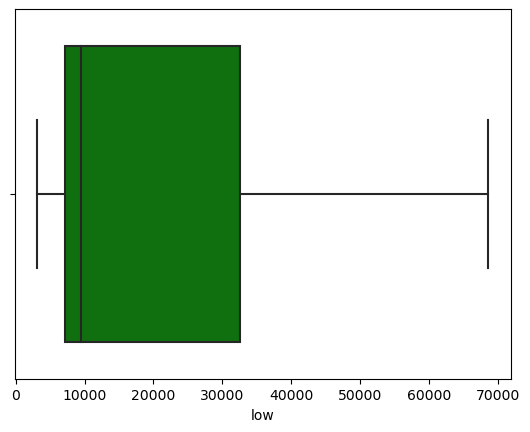

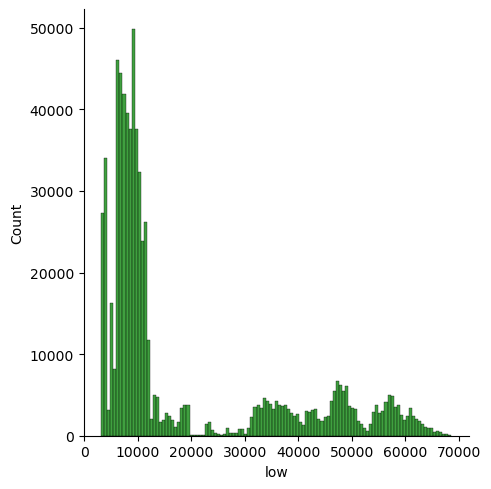

In [21]:
sns.boxplot(x=df['low'], color='green')
sns.displot(x=df['low'],color='green')

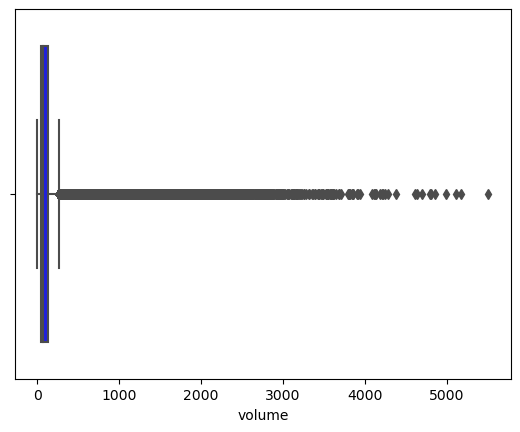

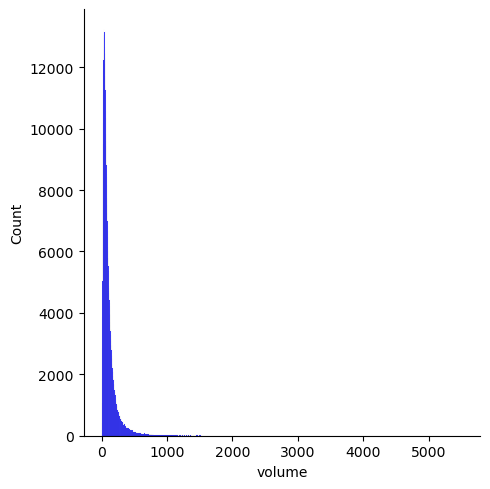

In [22]:
sns.boxplot(x=df['volume'], color='blue')
sns.displot(x=df['volume'],color='blue')

In [23]:
#here the volume has higher right skewness and higher outlier

In [24]:
#OUTLIER TREATMENT

In [25]:
minvolume,maxvolume=df['volume'].quantile([0.05,0.95])
print(round(minvolume,2))
print(round(maxvolume,2))

18.98
335.45


In [26]:
df['volume']=np.where(df['volume'] < minvolume,minvolume,df['volume'])
df['volume']=np.where(df['volume'] > maxvolume,maxvolume,df['volume'])

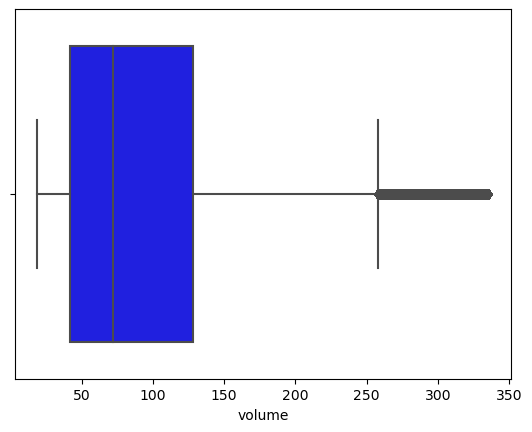

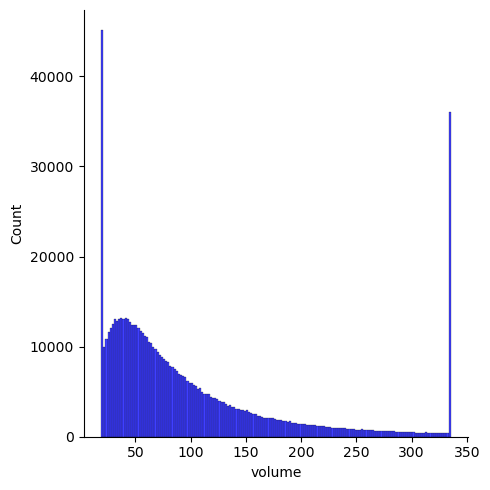

In [27]:
sns.boxplot(x=df['volume'], color='blue')
sns.displot(x=df['volume'],color='blue')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [31]:
data_model = df.drop(['datetime'], axis=1)

# Feature Engineering (You can customize this based on your domain knowledge)
# For demonstration, let's use the 'volume' as a feature
features = ['open', 'high', 'low', 'close', 'volume']

# Create a binary target variable: 1 if the price goes up, 0 if it goes down
data_model['target'] = (data_model['close'].shift(-1) > data_model['close']).astype(int)
data_model = data_model.dropna()  # Drop last row with NaN target

# Split the data into features (X) and target (y)
X = data_model[features]
y = data_model['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

# Visualization (You can customize this based on your requirements)
plt.scatter(X_test.index, X_test['close'], c=y_test, cmap='coolwarm', label='Actual')
plt.scatter(X_test.index, X_test['close'], c=y_pred, cmap='coolwarm', marker='x', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame with 'signal' column added
# This is a simplified example, you may need to adjust based on your strategy

# Backtesting
def backtest(data):
    initial_capital = 100000  # Starting capital
    capital = initial_capital
    position = 0  # Current position, 0 for no position

    for index, row in data.iterrows():
        # Buy signal
        if row['signal'] == 1:
            position = capital / row['close']
            capital = 0

        # Sell signal
        elif row['signal'] == -1:
            capital = position * row['close']
            position = 0

    # If there's any remaining position, sell it at the last close price
    if position > 0:
        capital = position * data['close'].iloc[-1]

    # Calculate returns
    returns = (capital - initial_capital) / initial_capital * 100

    return returns

# Apply backtest to your data
backtest_returns = backtest(data)
print(f"Backtesting Returns: {backtest_returns:.2f}%")


In [ ]:
# Assuming 'data' is your DataFrame with 'signal' column added
# This is a simplified example, you may need to adjust based on your strategy

# Risk Management
def apply_risk_management(data):
    max_drawdown = (data['close'].min() - data['close'].max()) / data['close'].max() * 100
    win_rate = (data['signal'].diff().fillna(0) == 1).sum() / (data['signal'].diff().fillna(0) != 0).sum() * 100

    print(f"Max Drawdown: {max_drawdown:.2f}%")
    print(f"Win Rate: {win_rate:.2f}%")

# Apply risk management to your data
apply_risk_management(data)


In [ ]:
import pandas as pd
import numpy as np

def calculate_metrics(trades_df, benchmark_return):
    # Calculate Max Drawdown
    max_drawdown = np.min(trades_df['cumulative_return'] - trades_df['cumulative_return'].cummax())

    # Calculate Sharpe Ratio
    daily_returns = trades_df['daily_return']
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)  # Assuming 252 trading days in a year

    # Check if Net Profit exceeds Benchmark
    net_profit_exceeds_benchmark = trades_df['net_profit'].iloc[-1] > benchmark_return

    # Calculate Risk-Reward Ratio
    risk_reward_ratio = -trades_df['average_loss'].mean() / trades_df['average_profit'].mean()

    # Calculate Max Duration Time of a Single Trade
    max_duration_time = trades_df['duration'].max()

    metrics = {
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Net Profit Exceeding Benchmark': net_profit_exceeds_benchmark,
        'Risk-Reward Ratio': risk_reward_ratio,
        'Max Duration Time of a Single Trade': max_duration_time,
    }

    return metrics

# Example Usage
trades_df = pd.read_csv('btc_3m.csv')  # Replace with your actual trades data
benchmark_return = 0.2  # Replace with your benchmark return

metrics = calculate_metrics(trades_df, benchmark_return)
print(metrics)
